# 1. Importing Datasets:

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [55]:
path = r'C:\Users\Sahil\Downloads\NVDA.csv'
df = pd.read_csv(path)

In [56]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-06-12,36.470001,37.924999,35.527500,37.492500,37.076328,169753200
1,2017-06-13,38.599998,38.692501,36.412498,37.849998,37.429855,167250400
2,2017-06-14,37.880001,38.514999,37.125000,37.930000,37.508972,118464000
3,2017-06-15,36.740002,38.400002,36.625000,38.092499,37.669662,96382400
4,2017-06-16,38.189999,38.674999,37.560001,37.904999,37.484249,92496000


In [57]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1255,2022-06-06,191.389999,193.369995,185.639999,187.860001,187.820297,42240600
1256,2022-06-07,184.720001,190.000000,181.880005,189.259995,189.219986,38891400
1257,2022-06-08,187.990005,191.800003,185.350006,186.479996,186.479996,36325200
1258,2022-06-09,184.809998,189.330002,180.410004,180.479996,180.479996,39557400
1259,2022-06-10,176.000000,176.970001,168.690002,169.740005,169.740005,46524800


In [58]:
df.shape

(1260, 7)

# 2. Data Wrangling:

#### Checking if there is any data missing:

In [59]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

#### Checking for inconsistency in data types:

In [60]:
print(df.dtypes)

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


There are no missing values and all the columns types are correctly defined.

In [61]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1.260000e+03
mean,104.245667,106.161260,102.120244,104.188327,103.927899,4.920926e+07
std,74.594439,76.233616,72.639107,74.435649,74.528081,2.500132e+07
min,31.622499,32.494999,31.115000,31.770000,31.554657,9.788400e+06
25%,47.730000,48.263749,46.923750,47.699374,47.265405,3.182070e+07
50%,63.825001,65.187500,62.774999,63.987499,63.539827,4.384260e+07
75%,140.021874,142.399372,137.488751,139.945625,139.818382,6.085220e+07
max,335.170013,346.470001,320.359985,333.760010,333.591766,2.511528e+08


# 3. Grouping the data into years:

In [62]:
df["Date"].dtype

dtype('O')

This is a type of "Object". We can convert it into DateTime using parsing date:

In [63]:
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d")

In [64]:
df["Years"] = df["Date"].dt.year
df["Months"] = df["Date"].dt.month
df

,Date,Open,High,Low,Close,Adj Close,Volume,Years,Months
0,2017-06-12,36.470001,37.924999,35.527500,37.492500,37.076328,169753200,2017,6
1,2017-06-13,38.599998,38.692501,36.412498,37.849998,37.429855,167250400,2017,6
2,2017-06-14,37.880001,38.514999,37.125000,37.930000,37.508972,118464000,2017,6
3,2017-06-15,36.740002,38.400002,36.625000,38.092499,37.669662,96382400,2017,6
4,2017-06-16,38.189999,38.674999,37.560001,37.904999,37.484249,92496000,2017,6
...,...,...,...,...,...,...,...,...,...
1255,2022-06-06,191.389999,193.369995,185.639999,187.860001,187.820297,42240600,2022,6
1256,2022-06-07,184.720001,190.000000,181.880005,189.259995,189.219986,38891400,2022,6
1257,2022-06-08,187.990005,191.800003,185.350006,186.479996,186.479996,36325200,2022,6
1258,2022-06-09,184.809998,189.330002,180.410004,180.479996,180.479996,39557400,2022,6


Rearranging the Columns:

In [65]:
year = df.pop("Years")
month = df.pop("Months")
df.insert(1, "Years", year)
df.insert(2, "Months", month)
df

,Date,Years,Months,Open,High,Low,Close,Adj Close,Volume
0,2017-06-12,2017,6,36.470001,37.924999,35.527500,37.492500,37.076328,169753200
1,2017-06-13,2017,6,38.599998,38.692501,36.412498,37.849998,37.429855,167250400
2,2017-06-14,2017,6,37.880001,38.514999,37.125000,37.930000,37.508972,118464000
3,2017-06-15,2017,6,36.740002,38.400002,36.625000,38.092499,37.669662,96382400
4,2017-06-16,2017,6,38.189999,38.674999,37.560001,37.904999,37.484249,92496000
...,...,...,...,...,...,...,...,...,...
1255,2022-06-06,2022,6,191.389999,193.369995,185.639999,187.860001,187.820297,42240600
1256,2022-06-07,2022,6,184.720001,190.000000,181.880005,189.259995,189.219986,38891400
1257,2022-06-08,2022,6,187.990005,191.800003,185.350006,186.479996,186.479996,36325200
1258,2022-06-09,2022,6,184.809998,189.330002,180.410004,180.479996,180.479996,39557400


In [66]:
df_year = df.drop("Months", axis=1)
df_grouped_yearly = df_year.groupby(["Years"], as_index=False).mean()
df_grouped_yearly

,Years,Open,High,Low,Close,Adj Close,Volume
0,2017,44.862943,45.372979,44.163883,44.819273,44.354749,6.627211e+07
1,2018,58.182002,59.091644,57.129831,58.096036,57.606849,5.480861e+07
2,2019,43.610050,44.252847,43.008095,43.646925,43.441381,4.563997e+07
3,2020,98.879723,100.637490,96.978409,98.907085,98.721872,4.808553e+07
4,2021,195.163174,198.509494,191.520218,195.219931,195.083891,3.595588e+07
5,2022,227.322162,233.299099,220.433694,226.646216,226.583884,5.562657e+07


# 4. Grouping the data into months:

In [67]:
df_month = df.groupby(["Years", "Months"], as_index=False).mean()
df_month

,Years,Months,Open,High,Low,Close,Adj Close,Volume
0,2017,6,38.242501,38.772667,37.291833,38.081333,37.658624,1.027422e+08
1,2017,7,39.782625,40.383375,39.146750,39.857500,39.415074,7.745508e+07
2,2017,8,41.311196,41.813587,40.699565,41.335000,40.888685,6.403572e+07
3,2017,9,43.612000,44.133250,42.992625,43.557250,43.111677,7.223668e+07
4,2017,10,48.011136,48.505113,47.515682,48.151250,47.658681,5.192120e+07
...,...,...,...,...,...,...,...,...
56,2022,2,245.577368,252.927370,238.630526,246.289473,246.195470,5.602247e+07
57,2022,3,247.614783,254.034347,241.559567,248.516521,248.462256,5.062869e+07
58,2022,4,223.484499,227.856998,215.479501,219.607001,219.560584,5.557195e+07
59,2022,5,177.193811,183.013333,171.366189,177.905714,177.868112,6.587153e+07


# 5. Exploratory Data Analysis:

### (i) Average Opening and Closing price per year:

In [68]:
df_avg_close_open = df_grouped_yearly[["Years", "Open", "Close"]]
df_avg_close_open

,Years,Open,Close
0,2017,44.862943,44.819273
1,2018,58.182002,58.096036
2,2019,43.610050,43.646925
3,2020,98.879723,98.907085
4,2021,195.163174,195.219931
5,2022,227.322162,226.646216


<AxesSubplot:xlabel='Years'>

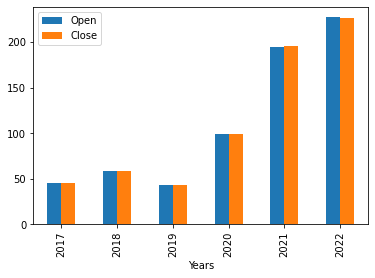

In [69]:
df_avg_close_open.plot.bar(x="Years")

### (ii) Average High and Low price per year:

In [70]:
df_grouped_yearly[["Years", "High", "Low"]]

,Years,High,Low
0,2017,45.372979,44.163883
1,2018,59.091644,57.129831
2,2019,44.252847,43.008095
3,2020,100.637490,96.978409
4,2021,198.509494,191.520218
5,2022,233.299099,220.433694


<AxesSubplot:xlabel='Years'>

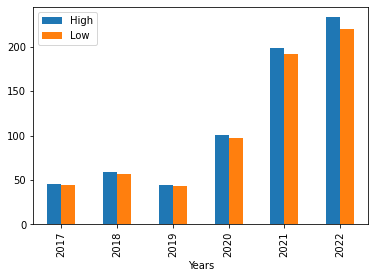

In [71]:
df_grouped_yearly[["Years", "High", "Low"]].plot.bar(x="Years")

We can clearly see that even the price changed from 2019 to 2020, almost doubling in just 1 year. The reason for this was the announcement of launch of 1650s series GPU in later 2020. Apart from that, there was another one reason for the price going up and it was, the market started to get back normal after the pandemic hit the world in 2019. Both of these reason could be seen as the prime reasons for Nvidia growing up in subsequent years after 2019.

Here also we can see that there is a significant increase in the price of nvidia stocks from year 2020 to 2021. This can be marked by the launch of GPU series 3000s that Nvidia decided to launch in mid 2021 that prove to be an excellent GPU with a lot of demand in market.

Source of infomation: <br>
    1.) https://www.nvidia.com/en-in/geforce/news/computex-2021-announcements/ <br>
    2.) https://www.nvidia.com/en-in/about-nvidia/corporate-timeline/

### (iii) Stocks bought Yearly:

In [72]:
df_total_yearly = df[["Years", "Volume"]].groupby("Years", as_index=False).sum()
df_total_yearly

,Years,Volume
0,2017,9344368000
1,2018,13756960800
2,2019,11501271600
3,2020,12165638000
4,2021,9060882200
5,2022,6174548800


Plotting the above data:

<AxesSubplot:xlabel='Years'>

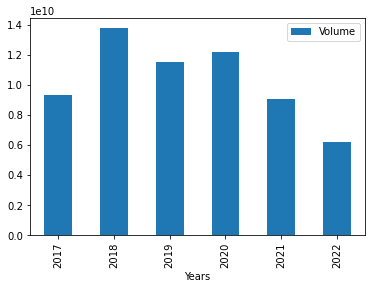

In [73]:
df_total_yearly.plot.bar(x = "Years")

From the above visualisation, we can see that the number of stocks bought generally decreased from 2018 to 2022. Comparing the stocks bought yearlt graph to that of average opening and closing price, we can see that year where the price was low, there were large amount of stocks bought as compared to years like 2021 where the price increased significantly and the stock bought decreased.

# 6. Per Year Analysis:

In [74]:
df_month_stock = df[["Years", "Months", "Volume"]].groupby(["Years", "Months"], as_index=False).sum()
df_month_stock

,Years,Months,Volume
0,2017,6,1541133600
1,2017,7,1549101600
2,2017,8,1472821600
3,2017,9,1444733600
4,2017,10,1142266400
...,...,...,...
56,2022,2,1064427000
57,2022,3,1164459900
58,2022,4,1111439000
59,2022,5,1383302100


### (i) For the year of 2017:

Grouping the year dataframe into months group:

In [75]:
df_2017 = df_month[["Years", "Months", "Open", "High", "Low", "Close"]][df_month["Years"] == 2017]
df_2017

,Years,Months,Open,High,Low,Close
0,2017,6,38.242501,38.772667,37.291833,38.081333
1,2017,7,39.782625,40.383375,39.146750,39.857500
2,2017,8,41.311196,41.813587,40.699565,41.335000
3,2017,9,43.612000,44.133250,42.992625,43.557250
4,2017,10,48.011136,48.505113,47.515682,48.151250
5,2017,11,52.852738,53.212500,51.974643,52.593691
6,2017,12,48.391750,48.969000,47.602000,48.275125


##### Average High and Low price monthly:

<AxesSubplot:xlabel='Months'>

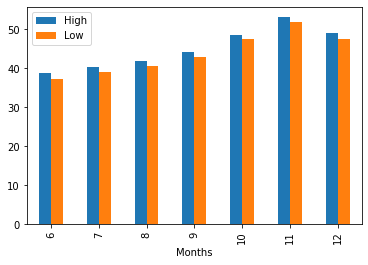

In [76]:
df_2017_avg_HL = df_2017[["Months", "High", "Low"]]
df_2017_avg_HL.plot.bar(x = "Months")

##### Average Open and Close price monthly:

<AxesSubplot:xlabel='Months'>

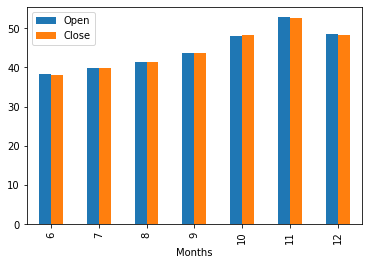

In [77]:
df_2017_avg_OC = df_2017[["Months", "Open", "Close"]]
df_2017_avg_OC.plot.bar(x = "Months")

##### Total Stock bought :

In [105]:
total_17 = df_month_stock.loc[df_month_stock["Years"]==2017]
print("The total number of stock bought in 2017 is", total_17["Volume"].sum())

The total number of stock bought in 2017 is 9344368000


In [139]:
total_17

,Years,Months,Volume
0,2017,6,1541133600
1,2017,7,1549101600
2,2017,8,1472821600
3,2017,9,1444733600
4,2017,10,1142266400
5,2017,11,1183089600
6,2017,12,1011221600


<AxesSubplot:xlabel='Months'>

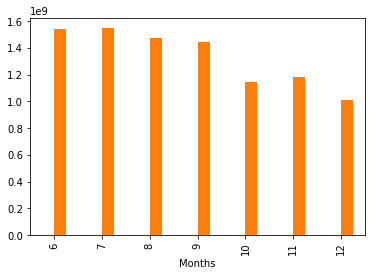

In [107]:
total_17.plot.bar(x = "Months", legend= False)

<b> From the graphs between average price and number of stocks bought, we can see there is a clear relationship between price and number of stocks for the year 2017, i.e. when the price of stock goes up, the number of stock bought decreases. </b>

### (ii) For the year of 2018:

We can also use <code>loc</code> method to find out the index for columns with 2018 as year:

In [79]:
df_2018 = df_month.loc[df_month["Years"]== 2018]
df_2018

,Years,Months,Open,High,Low,Close,Adj Close,Volume
7,2018,1,56.512976,57.421310,55.912262,56.884762,56.341973,5.455341e+07
8,2018,2,59.411579,60.581710,57.953684,59.176710,58.621953,7.850278e+07
9,2018,3,60.424643,61.405357,59.088690,60.212381,59.674902,6.723067e+07
10,2018,4,56.770595,57.590358,55.608453,56.491310,55.987046,5.306670e+07
11,2018,5,61.299659,62.197386,60.696477,61.600227,61.060794,5.444655e+07
12,2018,6,64.285477,64.937739,63.453810,64.117380,63.584339,4.183590e+07
13,2018,7,62.072262,62.785952,61.338333,62.167500,61.650671,3.010417e+07
14,2018,8,64.784674,65.773696,64.190108,65.206848,64.669688,4.746885e+07
15,2018,9,67.978815,68.751843,67.201184,67.977763,67.449504,3.336947e+07
16,2018,10,60.790761,61.840761,58.815652,60.006848,59.540531,5.642598e+07


##### Average High and Low price monthly:

<AxesSubplot:xlabel='Months'>

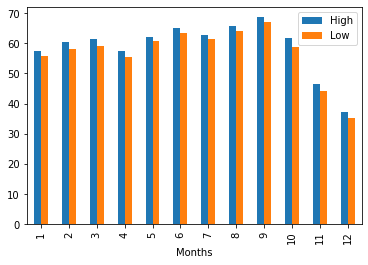

In [80]:
df_2018_avg_HL = df_2018[["Months", "High", "Low"]]
df_2018_avg_HL.plot.bar(x = "Months")

##### Average Open and Close price monthly:

<AxesSubplot:xlabel='Months'>

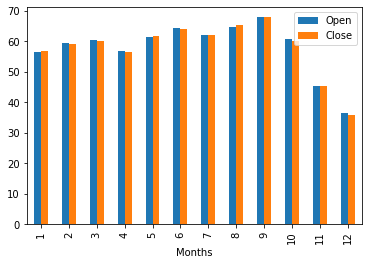

In [81]:
df_2018_avg_OC = df_2018[["Months", "Open", "Close"]]
df_2018_avg_OC.plot.bar(x = "Months")

##### Total Stock bought :

In [112]:
total_18 = df_month_stock.loc[df_month_stock["Years"]==2018]
print("The total number of stock bought in 2018 are",total_18["Volume"].sum())

The total number of stock bought in 2018 are 13756960800


In [140]:
total_18

,Years,Months,Volume
7,2018,1,1145621600
8,2018,2,1491552800
9,2018,3,1411844000
10,2018,4,1114400800
11,2018,5,1197824000
12,2018,6,878554000
13,2018,7,632187600
14,2018,8,1091783600
15,2018,9,634020000
16,2018,10,1297797600


<AxesSubplot:xlabel='Months'>

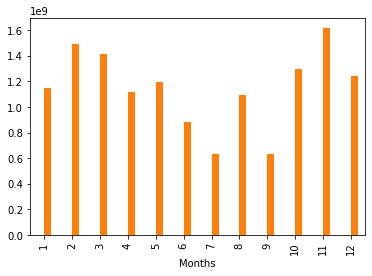

In [113]:
total_18.plot.bar(x = "Months", legend = False)

<b> From the graphs between average price and number of stocks bought, we can see there is a clear relationship between price and number of stocks for the year 2018, i.e. when the price of stock goes up, the number of stock bought decreases. This can be seen in the 8th and 9th month, those are, August and September, as the price went up, number of stocks bought decreased. </b>

### (iii) For the year of 2019:

In [114]:
df_2019 = df_month.loc[df_month["Years"]== 2019]
df_2019

,Years,Months,Open,High,Low,Close,Adj Close,Volume
19,2019,1,35.937619,36.956786,35.166905,36.248452,36.002750,8.033806e+07
20,2019,2,38.334605,38.957236,37.816579,38.295132,38.037634,6.024067e+07
21,2019,3,41.751667,42.517024,41.059286,41.831071,41.590350,5.746924e+07
22,2019,4,46.779762,47.266547,46.145714,46.785119,46.515888,4.494181e+07
23,2019,5,40.192500,40.710114,39.461250,39.989432,39.762850,5.082160e+07
24,2019,6,37.366875,37.947875,36.922625,37.417125,37.244266,4.116670e+07
25,2019,7,42.062954,42.506591,41.465341,41.995569,41.801558,3.825447e+07
26,2019,8,40.215568,40.788863,39.504659,40.093863,39.914189,4.295604e+07
27,2019,9,44.230250,44.855625,43.725625,44.315000,44.153940,3.173884e+07
28,2019,10,47.560109,48.322500,47.033043,47.666739,47.493497,3.346162e+07


##### Average High and Low price monthly:

<AxesSubplot:xlabel='Months'>

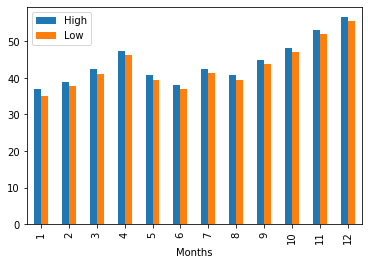

In [115]:
df_2019_avg_HL = df_2019[["Months", "High", "Low"]]
df_2019_avg_HL.plot.bar(x = "Months")

##### Average Open and Close price monthly:

<AxesSubplot:xlabel='Months'>

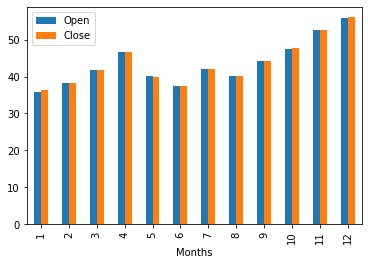

In [116]:
df_2019_avg_OC = df_2019[["Months", "Open", "Close"]]
df_2019_avg_OC.plot.bar(x = "Months")

##### Total Stock bought :

In [117]:
total_19 = df_month_stock.loc[df_month_stock["Years"]==2019]
print("The total number of stock bought in 2018 are",total_19["Volume"].sum())

The total number of stock bought in 2018 are 11501271600


In [141]:
total_19

,Years,Months,Volume
19,2019,1,1687099200
20,2019,2,1144572800
21,2019,3,1206854000
22,2019,4,943778000
23,2019,5,1118075200
24,2019,6,823334000
25,2019,7,841598400
26,2019,8,945032800
27,2019,9,634776800
28,2019,10,769617200


<AxesSubplot:xlabel='Months'>

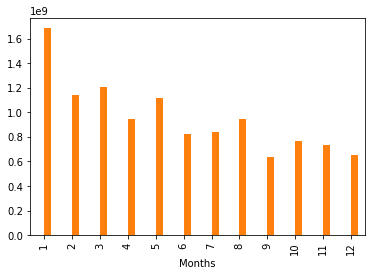

In [118]:
total_19.plot.bar(x = "Months", legend = False)

<b> From the graphs between average price and number of stocks bought, we can see there is a clear relationship between price and number of stocks for the year 2019, i.e. when the price of stock goes up, the number of stock bought decreases. This can be seen for the whole year, the price went up constantly and the number of stocks bought kept on decresing, like for 4th month, that is, April, the price went up and bought stocks decreased. <br /> 
Apart from that, the reason of price going up can be explained by the COVID19 coming up all across the world.
</b>

### (iv) For the year of 2020:

In [119]:
df_2020 = df_month.loc[df_month["Years"]== 2020]
df_2020

,Years,Months,Open,High,Low,Close,Adj Close,Volume
31,2020,1,61.182024,61.811548,60.434167,61.203214,61.025768,2.916863e+07
32,2020,2,67.050000,68.891448,66.039737,67.733159,67.540883,6.236133e+07
33,2020,3,60.518183,63.079205,58.258636,60.888182,60.747964,7.169978e+07
34,2020,4,69.391666,70.897620,67.797381,69.249167,69.089694,5.370621e+07
35,2020,5,81.483000,83.311125,79.973375,81.838125,81.649661,6.274438e+07
36,2020,6,91.100909,92.442727,89.457386,91.157501,90.983616,4.417938e+07
37,2020,7,102.068409,103.709318,100.466932,102.265341,102.076398,3.679296e+07
38,2020,8,118.995714,121.199642,117.377024,119.750714,119.529466,4.605973e+07
39,2020,9,128.181072,131.072977,124.355953,127.729525,127.531678,7.550739e+07
40,2020,10,136.371932,137.984432,134.062045,135.597500,135.387467,3.646525e+07


##### Average High and Low price monthly:

<AxesSubplot:xlabel='Months'>

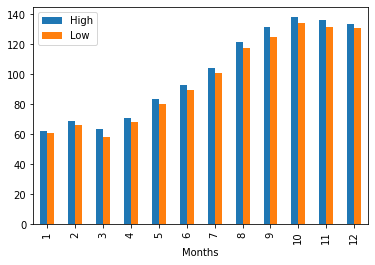

In [120]:
df_2020_avg_HL = df_2020[["Months", "High", "Low"]]
df_2020_avg_HL.plot.bar(x = "Months")

##### Average Open and Close price monthly:

<AxesSubplot:xlabel='Months'>

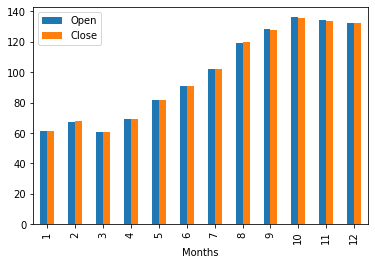

In [122]:
df_2020_avg_OC = df_2020[["Months", "Open", "Close"]]
df_2020_avg_OC.plot.bar(x = "Months")

##### Total Stock bought :

In [123]:
total_20 = df_month_stock.loc[df_month_stock["Years"]==2020]
print("The total number of stock bought in 2018 are",total_20["Volume"].sum())

The total number of stock bought in 2018 are 12165638000


In [142]:
total_20

,Years,Months,Volume
31,2020,1,612541200
32,2020,2,1184865200
33,2020,3,1577395200
34,2020,4,1127830400
35,2020,5,1254887600
36,2020,6,971946400
37,2020,7,809445200
38,2020,8,967254400
39,2020,9,1585655200
40,2020,10,802235600


<AxesSubplot:xlabel='Months'>

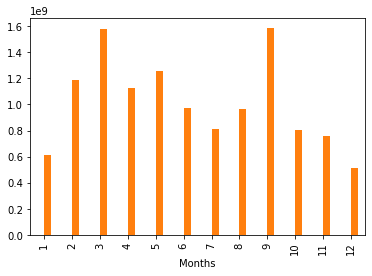

In [124]:
total_20.plot.bar(x = "Months", legend = False)

<b> From the graphs between average price and number of stocks bought, we can see there is a clear relationship between price and number of stocks for the year 2020, i.e. when the price of stock goes up, the number of stock bought decreases. Similar relation happened in the starting of 2020 an then price started to decrease again due to the 2nd time pandemic hit across the globe. <br />
We can also see that there was a huge increase in number of stocks bought of 9th month, this was because of the announcement of launch of 3000s series GPU.
</b>

### (v) For the year of 2021:

In [125]:
df_2021 = df_month.loc[df_month["Years"]== 2021]
df_2021

,Years,Months,Open,High,Low,Close,Adj Close,Volume
43,2021,1,133.247762,135.342762,130.924343,132.878553,132.711932,3.239038e+07
44,2021,2,142.455264,144.981581,139.883685,142.772764,142.593730,3.515960e+07
45,2021,3,129.464566,131.339348,126.399783,128.761088,128.632550,3.325503e+07
46,2021,4,149.351905,151.970475,147.565716,150.102975,149.966495,3.199427e+07
47,2021,5,146.845248,149.006498,144.369124,146.881999,146.748446,3.527190e+07
48,2021,6,180.734203,183.930115,178.814091,182.186704,182.052082,4.669678e+07
49,2021,7,196.891904,199.282978,193.318334,196.463452,196.329805,3.725275e+07
50,2021,8,206.461364,209.686816,203.222726,207.121819,206.982712,2.916539e+07
51,2021,9,219.931428,221.948098,216.718572,219.365716,219.255148,2.380470e+07
52,2021,10,219.762380,223.523809,217.514762,221.104285,220.992836,2.367180e+07


##### Average High and Low price monthly:

<AxesSubplot:xlabel='Months'>

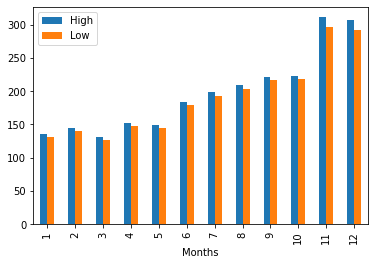

In [126]:
df_2021_avg_HL = df_2021[["Months", "High", "Low"]]
df_2021_avg_HL.plot.bar(x = "Months")

##### Average Open and Close price monthly:

<AxesSubplot:xlabel='Months'>

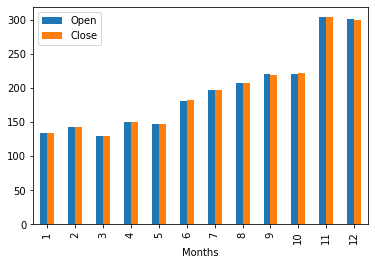

In [128]:
df_2021_avg_OC = df_2021[["Months", "Open", "Close"]]
df_2021_avg_OC.plot.bar(x = "Months")

##### Total Stock bought :

In [133]:
total_21 = df_month_stock.loc[df_month_stock["Years"]==2021]
print("The total number of stock bought in 2018 are",total_21["Volume"].sum())

The total number of stock bought in 2018 are 9060882200


In [143]:
total_21

,Years,Months,Volume
43,2021,1,615417200
44,2021,2,668032400
45,2021,3,764865600
46,2021,4,671879600
47,2021,5,705438000
48,2021,6,1027329200
49,2021,7,782307700
50,2021,8,641638600
51,2021,9,499898600
52,2021,10,497107800


<AxesSubplot:xlabel='Months'>

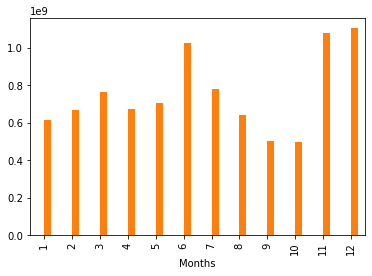

In [130]:
total_21.plot.bar(x = "Months", legend = False)

### (vi) For the year of 2022:

In [134]:
df_2022 = df_month.loc[df_month["Years"]== 2022]
df_2022

,Years,Months,Open,High,Low,Close,Adj Close,Volume
55,2022,1,259.750001,266.292999,250.981002,257.702501,257.604136,5.341082e+07
56,2022,2,245.577368,252.927370,238.630526,246.289473,246.195470,5.602247e+07
57,2022,3,247.614783,254.034347,241.559567,248.516521,248.462256,5.062869e+07
58,2022,4,223.484499,227.856998,215.479501,219.607001,219.560584,5.557195e+07
59,2022,5,177.193811,183.013333,171.366189,177.905714,177.868112,6.587153e+07
60,2022,6,185.736252,190.188751,181.298752,185.017498,184.992571,4.783805e+07


##### Average High and Low price monthly:

<AxesSubplot:xlabel='Months'>

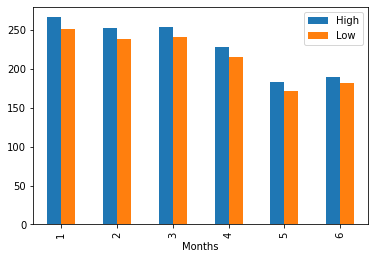

In [135]:
df_2022_avg_HL = df_2022[["Months", "High", "Low"]]
df_2022_avg_HL.plot.bar(x = "Months")

##### Average Open and Close price monthly:

<AxesSubplot:xlabel='Months'>

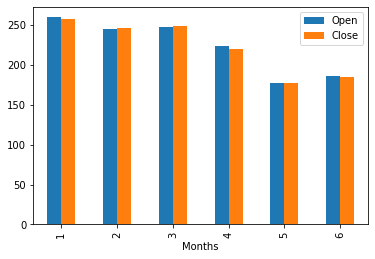

In [136]:
df_2022_avg_OC = df_2022[["Months", "Open", "Close"]]
df_2022_avg_OC.plot.bar(x = "Months")

##### Total Stock bought :

In [137]:
total_22 = df_month_stock.loc[df_month_stock["Years"]==2022]
print("The total number of stock bought in 2018 are",total_22["Volume"].sum())

The total number of stock bought in 2018 are 6174548800


In [144]:
total_22

,Years,Months,Volume
55,2022,1,1068216400
56,2022,2,1064427000
57,2022,3,1164459900
58,2022,4,1111439000
59,2022,5,1383302100
60,2022,6,382704400


<AxesSubplot:xlabel='Months'>

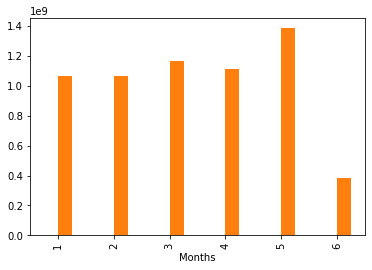

In [138]:
total_22.plot.bar(x = "Months", legend = False)